In [1]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator ## Data Augmentation
import matplotlib.pyplot as plt

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [3]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

FIND: Parameter format not correct


In [4]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [5]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [6]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [7]:
BATCH_SIZE = 100   # Number of training examples to process before updating our models variables
IMAGE_SIZE = 150
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

In [8]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [9]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


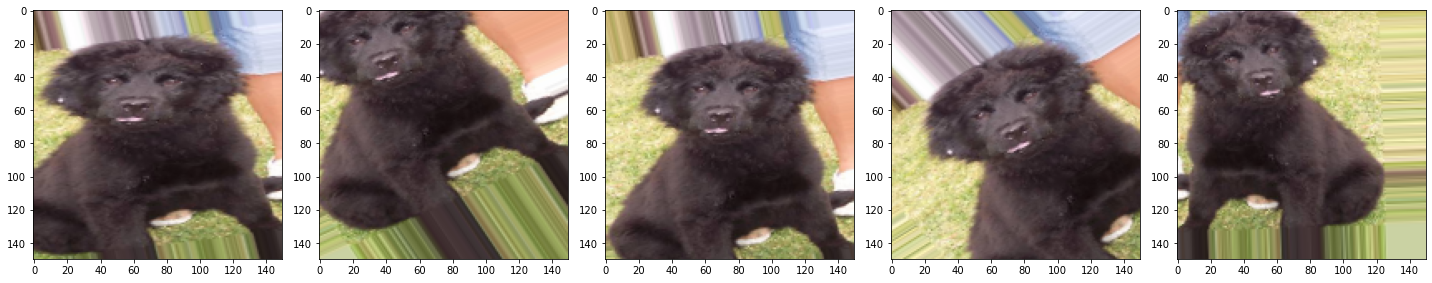

In [10]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [11]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
20/20 [==============================] - 70s 4s/step - loss: 0.7031 - accuracy: 0.5255 - val_loss: 0.6858 - val_accuracy: 0.6000
Epoch 2/100
20/20 [==============================] - 80s 4s/step - loss: 0.6854 - accuracy: 0.5535 - val_loss: 0.6602 - val_accuracy: 0.5790
Epoch 3/100
20/20 [==============================] - 17s 843ms/step - loss: 0.6646 - accuracy: 0.5865 - val_loss: 0.6788 - val_accuracy: 0.5400
Epoch 4/100
20/20 [==============================] - 17s 855ms/step - loss: 0.6495 - accuracy: 0.6105 - val_loss: 0.6303 - val_accuracy: 0.6640
Epoch 5/100
20/20 [==============================] - 19s 927ms/step - loss: 0.6287 - accuracy: 0.6445 - val_loss: 0.6258 - val_accuracy: 0.6370
Epoch 6/100
20/20 [==============================] - 31s 2s/step - loss: 0.6079 - accuracy: 0.6630 - val_loss: 0.5800 - val_accuracy: 0.6730
Epoch 7/100
20/20 [==============================] - 21s 1s/step - lo

20/20 [==============================] - 20s 982ms/step - loss: 0.3709 - accuracy: 0.8295 - val_loss: 0.4155 - val_accuracy: 0.8160
Epoch 55/100
20/20 [==============================] - 19s 968ms/step - loss: 0.3399 - accuracy: 0.8605 - val_loss: 0.3862 - val_accuracy: 0.8290
Epoch 56/100
20/20 [==============================] - 18s 916ms/step - loss: 0.3360 - accuracy: 0.8500 - val_loss: 0.3923 - val_accuracy: 0.8150
Epoch 57/100
20/20 [==============================] - 18s 899ms/step - loss: 0.3377 - accuracy: 0.8550 - val_loss: 0.4190 - val_accuracy: 0.8210
Epoch 58/100
20/20 [==============================] - 18s 911ms/step - loss: 0.3386 - accuracy: 0.8520 - val_loss: 0.3998 - val_accuracy: 0.8150
Epoch 59/100
20/20 [==============================] - 17s 861ms/step - loss: 0.3258 - accuracy: 0.8585 - val_loss: 0.3933 - val_accuracy: 0.8220
Epoch 60/100
20/20 [==============================] - 18s 900ms/step - loss: 0.3175 - accuracy: 0.8635 - val_loss: 0.4280 - val_accuracy: 0.812

In [ ]:
## Training Accuracy is 100 %, that means it is a overfitting

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()